In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA


In [2]:
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')


In [3]:
# Assuming customer_id is the common column
merged_df = pd.merge(customers_df, transactions_df, on='CustomerID')


In [4]:
# Calculate total spend per customer
customer_spend = merged_df.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spend.columns = ['CustomerID', 'TotalSpend']

In [5]:
# Calculate transaction count per customer
transaction_count = merged_df.groupby('CustomerID').size().reset_index(name='TransactionCount')

In [6]:
# Merge aggregated transaction data with customer data
customer_data = pd.merge(customers_df, customer_spend, on='CustomerID')
customer_data = pd.merge(customer_data, transaction_count, on='CustomerID')

In [7]:
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)


In [8]:
from sklearn.preprocessing import StandardScaler

features = customer_data[['TotalSpend', 'TransactionCount']]  # Add other features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


Clustering

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)
clusters = kmeans.labels_

# Add cluster labels to the dataframe
customer_data['Cluster'] = clusters


C:\Users\Samarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Samarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Visualizing Clusters

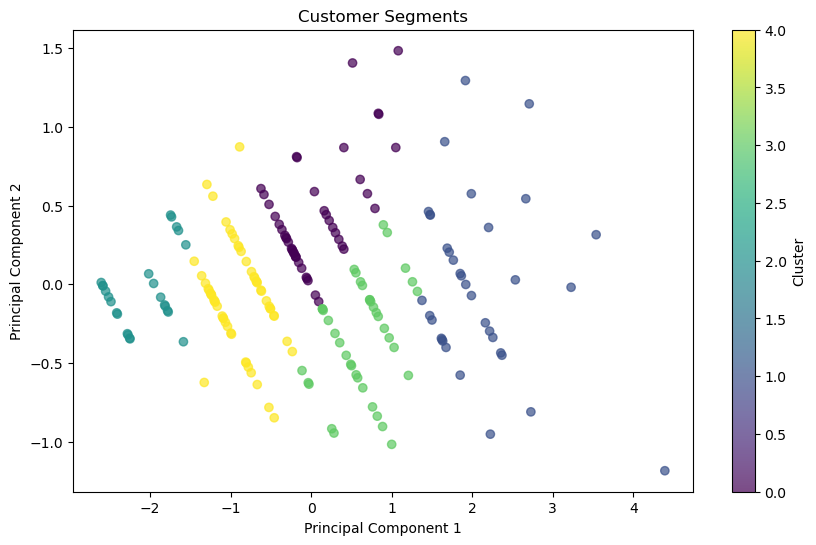

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


Clustering Metrics

In [14]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(scaled_features, clusters)
print(f"DB Index: {db_index}")


DB Index: 0.8572292997121386


In [15]:
# Calculate Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.39150290793371384


In [16]:
# Calculate WCSS (Within-Cluster Sum of Squares)
wcss = kmeans.inertia_
print(f"WCSS Value: {wcss}")

WCSS Value: 63.9333774059338
